## **Practical Work 3**

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

To have a dataset or set of data points, the student must generate a pair of arrays X and y with the values in X equally distributed between 0 and 20 and the values in y such that: yi = a*xi + b (and a = -1, b = 2)

In [2]:
X = random.sample(range(0,20), 20)
print(X)
print(type(X))
x = np.array(X) # to convert list to numpy array
print(x)
print(type(x))

[7, 2, 19, 3, 6, 17, 8, 12, 5, 11, 1, 15, 4, 0, 14, 16, 10, 9, 18, 13]
<class 'list'>
[ 7  2 19  3  6 17  8 12  5 11  1 15  4  0 14 16 10  9 18 13]
<class 'numpy.ndarray'>


In [3]:
y = -1*x + 2
print(y)
print(type(y))

[ -5   0 -17  -1  -4 -15  -6 -10  -3  -9   1 -13  -2   2 -12 -14  -8  -7
 -16 -11]
<class 'numpy.ndarray'>


#### Plot your data points. 

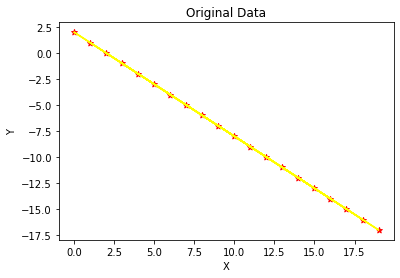

In [4]:
plt.scatter(x, y, marker='*', c="red")
plt.plot(x, y, c= "yellow")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Original Data")
plt.show()

## Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
##Coose the suitable number of iterations, learning rate, and stop criteria

In [5]:
x = np.column_stack((np.ones(len(X), dtype=int),X))
print(x.shape)
print(len(x))
y = y.reshape(-1,1)

(20, 2)
20


In [6]:
def Batch_GD_momentum(x, y, max_iteration, alpha, Gamma, stop_critia):

  # lists to return it
  loss_fun = []
  theta0 = []
  theta1= []
  all_y_predict = []
  
  # number of observation
  m = x.shape[0]
  # Create theta matrix of size x.shape[1]X1
  thetas = np.zeros((x.shape[1], 1))
  v = 0   # initial velocity
  count = 0
  for i in range(max_iteration):
    count+= 1
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_old = (1/(2*m))*np.sum((y_predict - y)**2)

    # calculate Gradient descent
    Grad = (1/m)*np.transpose(x) @ (y_predict - y)         # x shape (20, 2), y shape (20,1) , so x must be transpose after product y
    v= Gamma*v - (alpha*Grad)
    thetas = thetas + v

    # Update y_predict && cost function After Gradient
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_new = (1/(2*m))*np.sum((y_predict - y)**2)

    loss_fun.append(cost_function_new)
    theta0.append(thetas[0])
    theta1.append(thetas[1])
    all_y_predict.append(y_predict)

    ## cases for stop iterations
    if abs(cost_function_new - cost_function_old) < stop_critia:         #  stop critical cost function (stop when it doesn't decrease with iteration)
       print(f"Convergence occure at {count} iterations")
       return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun
    
    # if (np.linalg.norm(Grad, 2))< 0.01:                                     # stop critical Gradient (check if the algorithm reached the minimum )
    #    print(f'reached to minimum point at {count} iterations')
    #    return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun

  return y_predict , all_y_predict , thetas, theta0, theta1, loss_fun


#### Try your function with any input parameterss of your choice.

In [7]:
y_predict , all_y_predict , thetas, theta0, theta1, loss_fun = Batch_GD_momentum(x, y, 1000, 0.001, 0.8, 0.0001)


### Calculate r2 score

In [8]:
###### to evaluate the performance (measure accuracy) of model use r2_score

from sklearn.metrics import r2_score
score = r2_score(y, y_predict)
print(f"the accuracy of model is = {score}")


the accuracy of model is = 0.9976374468048009


### Plot loss vs. epochs

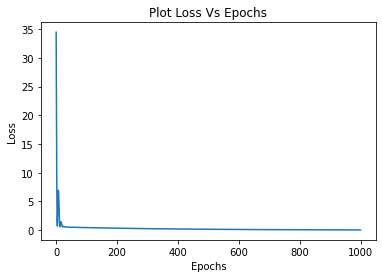

In [9]:
plt.plot(loss_fun )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

1000
1000


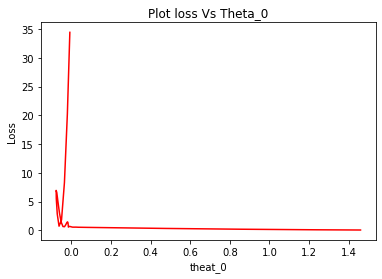

In [10]:
print(len(theta0))
print(len(loss_fun))
plt.plot(theta0, loss_fun, c = "red")
plt.xlabel("theat_0")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0")
plt.show()

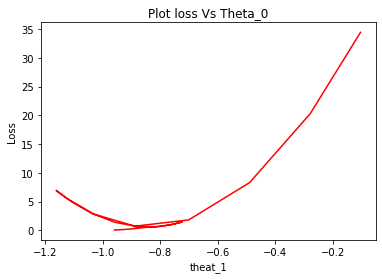

In [11]:
 
plt.plot(theta1, loss_fun, c = "red")
plt.xlabel("theat_1")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0")
plt.show()

#### Plot all regression lines till converge

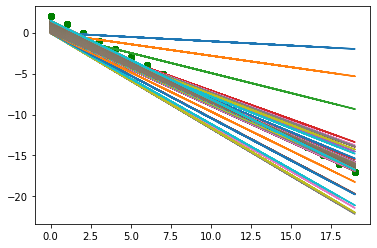

In [12]:
for py in all_y_predict:
    plt.scatter(X,y, color = 'green')
    plt.plot(X, py)
plt.show()

### Plot The Best Regression Line

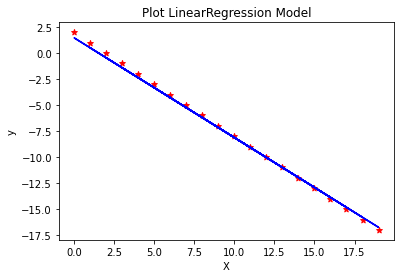

In [13]:
plt.scatter(X,y, marker = '*',color = 'red')
plt.plot(X,y_predict , color = 'blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression Model")
plt.show()

Try another values of momentum term and check your reults.
Try very large values close to one and very small values close to zero.
Try momentum = 0

In [14]:
y_predict , all_y_predict , thetas, theta0, theta1, loss_fun = Batch_GD_momentum(x, y, 1000, 0.001, 0.1, 0.001)
print(f"the accuracy of model is = {r2_score(y, y_predict)}")


Convergence occure at 34 iterations
the accuracy of model is = 0.9660733638161372


In [15]:
y_predict , all_y_predict , thetas, theta0, theta1, loss_fun = Batch_GD_momentum(x, y, 1000, 0.001, 0.001, 0.001)
print(f"the accuracy of model is = {r2_score(y, y_predict)}")

Convergence occure at 38 iterations
the accuracy of model is = 0.9660635151716555


### **Update your Batch GD for one variable  implementation to be NAG and check your results**

In [16]:
def Batch_GD_NAG(x, y, max_iteration, alpha, Gamma, stop_critia):

  # lists to return it
  loss_fun = []
  theta0 = []
  theta1= []
  all_y_predict = []
  
  # number of observation
  m = x.shape[0]
  # Create theta matrix of size x.shape[1]X1
  thetas = np.zeros((x.shape[1], 1))
  v = 0   # initial velocity
  count = 0
  for i in range(max_iteration):
    count+= 1
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_old = (1/(2*m))*np.sum((y_predict - y)**2)

    ## first make a big jump in the direction of the previous accumulated gradient
    # calculate looking ahead step (thetas_tem)
    thetas_temp = thetas - Gamma*v
    ## then measure the gradient where you end up and make a correction
    ## make by to three steps
    # first calculate y at thetas_temp
    y_predict_temp = x @ thetas_temp
    # second calculate grad at theta_tem
    Grad_temp = (1/m)*np.transpose(x) @ (y_predict_temp - y) 
    # third calculate thetas
    thetas = thetas_temp - (alpha * Grad_temp)

    # Update v
    v= Gamma*v + (alpha*Grad_temp)
    # Update y_predict && cost function After Gradient
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_new = (1/(2*m))*np.sum((y_predict - y)**2)

    loss_fun.append(cost_function_new)
    theta0.append(thetas[0])
    theta1.append(thetas[1])
    all_y_predict.append(y_predict)

    ## cases for stop iterations
    if abs(cost_function_new - cost_function_old) < stop_critia:         #  stop critical cost function (stop when it doesn't decrease with iteration)
       print(f"Convergence occure at {count} iterations")
       return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun
    
    # if (np.linalg.norm(Grad, 2))< 0.01:                                     # stop critical Gradient (check if the algorithm reached the minimum )
    #    print(f'reached to minimum point at {count} iterations')
    #    return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun

  return y_predict , all_y_predict , thetas, theta0, theta1, loss_fun

In [17]:
y_predict_NAG , all_y_predict_NAG  , thetas_NAG , theta0_NAG , theta1_NAG , loss_fun_NAG  = Batch_GD_NAG(x, y, 1000, 0.001, 0.9, 0.0001)

Convergence occure at 639 iterations


## calculate R2 Score

In [18]:

###### to evaluate the performance (measure accuracy) of model use r2_score

from sklearn.metrics import r2_score
score = r2_score(y, y_predict_NAG)
print(f"the accuracy of model is = {score}")

the accuracy of model is = 0.9989061925830395


## Plot Loss Vs Epochs

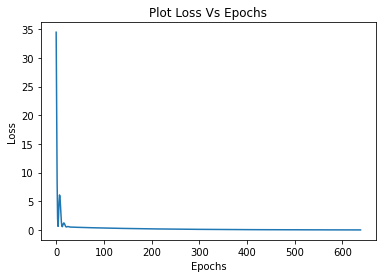

In [19]:
plt.plot(loss_fun_NAG )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

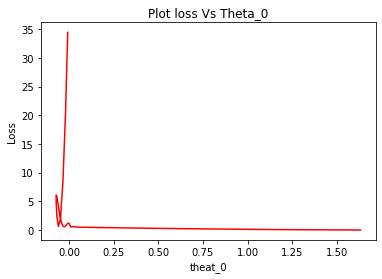

In [20]:
plt.plot(theta0_NAG, loss_fun_NAG, c = "red")
plt.xlabel("theat_0")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0")
plt.show()

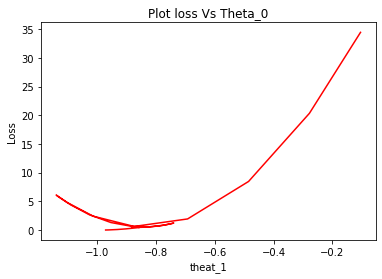

In [21]:
plt.plot(theta1_NAG, loss_fun_NAG, c = "red")
plt.xlabel("theat_1")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0")
plt.show()

#### Plot all regression lines till converge

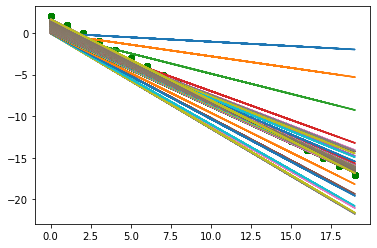

In [22]:
for py in all_y_predict_NAG:
    plt.scatter(X,y, color = 'green')
    plt.plot(X, py)
plt.show()

### Plot The Best Regression Line

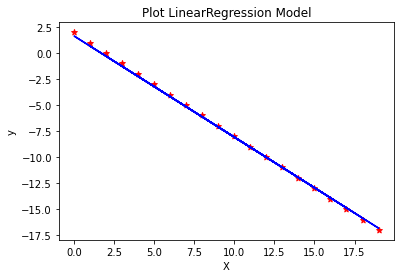

In [23]:
plt.scatter(X,y, marker = '*',color = 'red')
plt.plot(X,y_predict_NAG , color = 'blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression Model")
plt.show()